In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
answers = []
def question_answer(question_number, answer):
    answer_str = f"Question {question_number}: {answer}"
    answers.append(answer_str)
    print (answer_str)

In [3]:
january_trips_pd = pd.read_parquet("data/fhv_tripdata_2021-01.parquet")

In [4]:
question_answer(1, len(january_trips_pd))

Question 1: 1154112


In [5]:
january_trips_pd['duration'] = january_trips_pd['dropOff_datetime']-january_trips_pd['pickup_datetime']
january_trips_pd['duration'] = january_trips_pd['duration'].apply(lambda x: x.total_seconds()/60)

In [6]:
question_answer(2, january_trips_pd['duration'].mean())

Question 2: 19.167224093791006


In [7]:
january_trips_pd['duration']

0           17.000000
1           17.000000
2          110.000000
3            8.283333
4           15.216667
              ...    
1154107      8.750000
1154108     57.600000
1154109     16.200000
1154110     19.433333
1154111     36.000000
Name: duration, Length: 1154112, dtype: float64

In [8]:
january_trips_pd = january_trips_pd[(january_trips_pd.duration>=1)&(january_trips_pd.duration<=60)]

In [9]:
len(january_trips_pd)

1109826

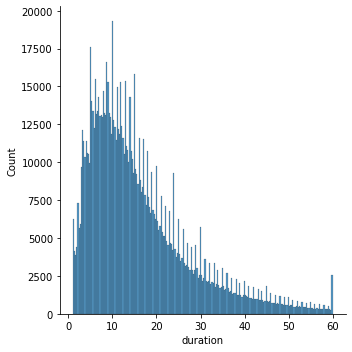

In [10]:
sns.displot(january_trips_pd.duration)

In [11]:
train_features = ['PUlocationID', 'DOlocationID']

In [12]:
for feature in train_features:
    january_trips_pd[feature].fillna(-1, inplace=True)
    january_trips_pd[feature]=january_trips_pd[feature].astype(str)

In [13]:
question_answer(3, (january_trips_pd['PUlocationID']=='-1.0').mean())

Question 3: 0.8352732770722617


In [14]:
train_dicts = january_trips_pd[train_features].to_dict(orient='records')
vectorizer = DictVectorizer()
dv = vectorizer.fit_transform(train_dicts)

In [15]:
question_answer(4, dv.shape[1])

Question 4: 525


In [16]:
model=LinearRegression()
model.fit(dv, january_trips_pd.duration)

LinearRegression()

In [17]:
rmse_train = mean_squared_error(january_trips_pd.duration, model.predict(dv), squared=False)
question_answer(5, rmse_train)

Question 5: 10.528519107211306


In [18]:
february_trips_pd = pd.read_parquet("data/fhv_tripdata_2021-02.parquet")
february_trips_pd['duration'] = february_trips_pd['dropOff_datetime']-february_trips_pd['pickup_datetime']
february_trips_pd['duration'] = february_trips_pd['duration'].apply(lambda x: x.total_seconds()/60)
february_trips_pd = february_trips_pd[(february_trips_pd.duration>=1)&(february_trips_pd.duration<=60)]
for feature in train_features:
    february_trips_pd[feature].fillna(-1, inplace=True)
    february_trips_pd[feature]=february_trips_pd[feature].astype(str)
val_dicts = february_trips_pd[train_features].to_dict(orient='records')
dv_val = vectorizer.transform(val_dicts)

In [19]:
rmse_val = mean_squared_error(february_trips_pd.duration, model.predict(dv_val), squared=False)
question_answer(6, rmse_val)

Question 6: 11.01428319227392


In [20]:
for answers in answers:
    print(answers)

Question 1: 1154112
Question 2: 19.167224093791006
Question 3: 0.8352732770722617
Question 4: 525
Question 5: 10.528519107211306
Question 6: 11.01428319227392
